## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "/Users/leishla/Desktop/Bootcamp/nu-chi-data-pt-03-2020-u-c/Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/leishla/Desktop/Bootcamp/nu-chi-data-pt-03-2020-u-c/Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)

In [4]:
# Combine the data into a single dataset
total_data_df = pd.merge(study_df,mouse_df,on="Mouse ID",how="outer")

In [5]:
# Checking the number of mice in the DataFrame.
total_data_df["Mouse ID"].count()

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates_df = total_data_df[total_data_df.duplicated(subset=["Mouse ID","Timepoint","Tumor Volume (mm3)"],keep="first")]

duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = total_data_df.drop_duplicates(subset=["Mouse ID","Timepoint","Tumor Volume (mm3)"],keep=False)

data_sort_df = clean_df.sort_values(["Timepoint","Tumor Volume (mm3)"],ascending=True)

newindex_df = data_sort_df.reset_index(drop=True)

newindex_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

1891

## Summary Statistics

In [9]:
# Mean, Median, Variance, Standard Deviation, and SEM of the tumor volume for each regimen

drug_group_df = clean_df.groupby("Drug Regimen")

drugs = drug_group_df["Drug Regimen"]

tumor_mean = drug_group_df["Tumor Volume (mm3)"].mean()

tumor_median = drug_group_df["Tumor Volume (mm3)"].median()

tumor_variance = drug_group_df["Tumor Volume (mm3)"].var(ddof = 0)

tumor_sd = drug_group_df["Tumor Volume (mm3)"].std(ddof = 0)

tumor_sem = drug_group_df["Tumor Volume (mm3)"].sem(ddof = 0)

In [10]:
#Summary statistics table

summary_df = pd.DataFrame(columns=["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Standard Deviation", "Tumor Volume Standard Error"])

summary_df["Mean Tumor Volume"] = tumor_mean
summary_df["Median Tumor Volume"] = tumor_median
summary_df["Tumor Volume Variance"] = tumor_variance
summary_df["Tumor Volume Standard Deviation"] = tumor_sd
summary_df["Tumor Volume Standard Error"] = tumor_sem

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.414660,50.965298,41.934482,6.475684,0.513555
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


## Bar Plots

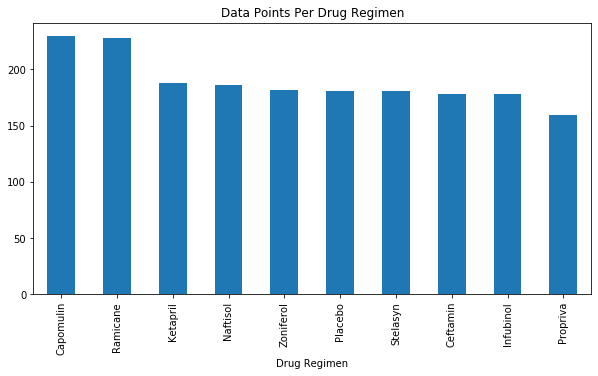

In [11]:
#Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

#Bar plot data
data_and_drugs = clean_df[["Drug Regimen","Mouse ID"]]
data_and_drugs = data_and_drugs.set_index("Drug Regimen")
dd_group_df = data_and_drugs.groupby("Drug Regimen").count()
dd_order_df = dd_group_df.sort_values(by="Mouse ID", ascending=False)

#Create bar plot
dd_order_df.plot(kind="bar", legend=False, width=0.5, figsize=(10,5))

#Chart title
plt.title("Data Points Per Drug Regimen")

plt.show()

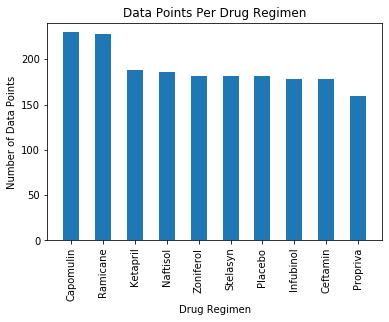

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#Bar plot data
drug_data_df = drug_group_df["Mouse ID"].count()
drug_sort_df = drug_data_df.sort_values(ascending=False)
drugs = drug_group_df["Drug Regimen"]

#Create bar plot
x_axis = np.arange(len(drugs))
plt.bar(x_axis,drug_sort_df, width=0.5, align="center")

#Headers for x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", 
                            "Ketapril", "Naftisol", 
                            "Zoniferol", "Stelasyn", 
                            "Placebo", "Infubinol", 
                            "Ceftamin", "Propriva"], rotation="vertical")

#Chart limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_sort_df)+10)

#Chart title and axis labels
plt.title("Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

## Pie Plots

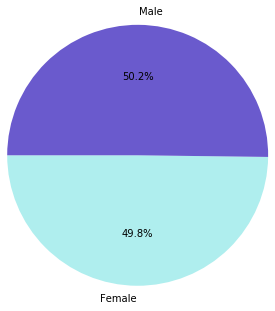

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Mice sex data
sex_df = clean_df[["Mouse ID","Sex"]]
sex_duplicates_df = sex_df.drop_duplicates("Mouse ID", keep="first")
sex_group_df = sex_duplicates_df.groupby("Sex")
sex_count_df = sex_group_df.count()
sex_total = sex_duplicates_df["Mouse ID"].count()
sex_percent_df = sex_count_df/sex_total

#Pie chart labels
pdpie_labels = ["Female","Male"]

#Values for each section of the pie chart
pdpie_values = sex_percent_df["Mouse ID"]

#Colors for each section of the pie chart
pdpie_colors = ["paleturquoise","slateblue"]

#Create pie chart
plt.pie(pdpie_values, labels=pdpie_labels, colors=pdpie_colors, autopct="%1.1f%%",radius=1.5, startangle=180)

plt.show()

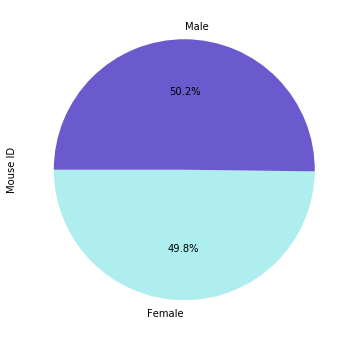

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_values = sex_percent_df["Mouse ID"]

sex_percent_df.plot(kind="pie", 
                    y="Mouse ID", 
                    autopct="%1.1f%%",
                    legend=False, 
                    figsize=(6,6), 
                    use_index=True, 
                    startangle=180, 
                    colors=pdpie_colors)
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
#Most promising regimes
newmouse_df = clean_df.drop_duplicates("Mouse ID",keep="last")
mouse_sort_df = newmouse_df.sort_values("Tumor Volume (mm3)", ascending=True)
mi_df = mouse_sort_df.set_index("Drug Regimen")
regimes = mi_df["Tumor Volume (mm3)"].min(level="Drug Regimen").head(4)

regimes

Drug Regimen
Ramicane     22.050126
Capomulin    23.343598
Infubinol    36.321346
Naftisol     45.000000
Name: Tumor Volume (mm3), dtype: float64

In [16]:
#Final tumor volume of each mouse across the four most promising treatment regimens
ramicane = mi_df.loc["Ramicane",:]
ramicane_data = ramicane["Tumor Volume (mm3)"]

capomulin = mi_df.loc["Capomulin",:]
capomulin_data = capomulin["Tumor Volume (mm3)"]

infubinol = mi_df.loc["Infubinol",:]
infubinol_data = infubinol["Tumor Volume (mm3)"]

naftisol = mi_df.loc["Naftisol",:]
naftisol_data = naftisol["Tumor Volume (mm3)"]

In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ramicane_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


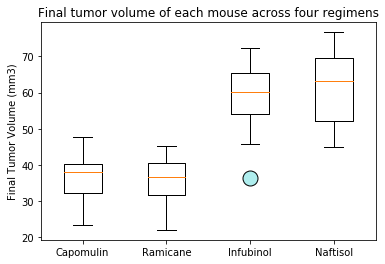

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Box plot data
data = [capomulin_data,ramicane_data,infubinol_data,naftisol_data]

#Box plot formatting 
flierprops = dict(marker= "o", markerfacecolor= "paleturquoise", markersize= 15)

#Create boxplot
fig,ax = plt.subplots()
ax.boxplot(data, flierprops=flierprops)

#Boxplot Title and labels
ax.set_xticklabels(["Capomulin", "Ramicane","Infubinol","Naftisol"])
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final tumor volume of each mouse across four regimens")

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

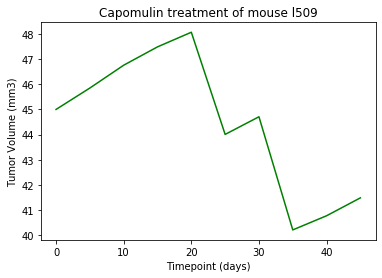

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Select mouse for line plot
mouse_index_df = clean_df.set_index("Mouse ID")
capomulin_mouse = mouse_index_df.loc["l509", :]

#Line plot data 
capomulin_tumor = capomulin_mouse["Tumor Volume (mm3)"].unique()
capomulin_timepoints = capomulin_mouse["Timepoint"].unique()

#Create line plot
plt.plot(capomulin_timepoints, capomulin_tumor, color = "green")

#Line plot formatting 
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")


Text(0.5, 1.0, 'Scatter Plot of Mouse Weight vs. Average Tumor Volume (mm3)')

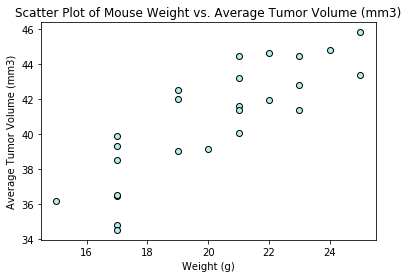

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Scatter plot data 
drug_index_df = clean_df.set_index("Drug Regimen")
cap_df = drug_index_df.loc["Capomulin",:]
capgroup_df = cap_df.groupby("Mouse ID")
capmean_df = capgroup_df["Tumor Volume (mm3)"].mean()
capomulin_weight = capgroup_df["Weight (g)"].unique()

#Values for x axis 
x_limit = 26
scatterx_axis = np.arange(14, 26, 1)

#Create scatter plot
plt.scatter(capomulin_weight, capmean_df, marker = "o", facecolors = "paleturquoise", edgecolors = "black")

#Scatter plot title and labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Scatter Plot of Mouse Weight vs. Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between both factors is 0.84


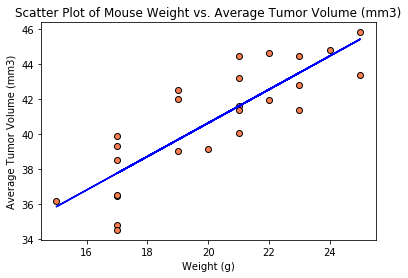

In [21]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#Create scatter plot
plt.scatter(capomulin_weight, capmean_df, marker = "o", facecolors = "coral", edgecolors = "black")

#Scatter plot title and labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Scatter Plot of Mouse Weight vs. Average Tumor Volume (mm3)")

#Calculate correlation coefficitent for mouse weight and average tumor volume for the Capomulin regimen
capomulin_weight_float = capomulin_weight.astype(float)
cap_weight_list = capomulin_weight_float.tolist()
capmean_list = capmean_df.tolist()
correlation = st.pearsonr(capomulin_weight_float,capmean_list)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#Calculate linear regression for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_weight_float,capmean_list)
regression = capomulin_weight_float * slope + intercept
plt.plot(capomulin_weight_float, regression, "b-")
